In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time as _time
from datetime import datetime, timedelta 

In [2]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")


In [4]:
storms = pd.read_excel("StormEvents2015 - Copy.xlsx")
winds = pd.read_excel("2015_windV1.xlsx")

In [5]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
train.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0


In [64]:
storms.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,STATE,STATE_FIPS,YEAR,...,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,201501,27,1200,201501,28,400,92561,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201501,24,700,201501,24,2100,92625,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201501,27,600,201501,27,1200,92561,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201502,14,800,201502,15,1700,93895,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201502,7,2200,201502,10,500,93902,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
winds.head()

,ID,Year,Month,Day,Date,Time,Time zone,State,State FIPS number,State Number,...,Length,Width,Number of States affected,State number,Tornado Segment number,1st County FIPS code,2nd County FIPS code,3rd County FIPS code,4th County FIPS code,Wind only
0,555384,2015,1,1,2015-01-01,14:08:00,3,GA,13,0,...,0,0,0,0,0,51,0,0,0,EG
1,555385,2015,1,1,2015-01-01,14:10:00,3,GA,13,0,...,0,0,0,0,0,51,0,0,0,EG
2,547892,2015,1,3,2015-01-03,03:15:00,3,TX,48,0,...,0,0,0,0,0,241,0,0,0,EG
3,549101,2015,1,3,2015-01-03,03:15:00,3,LA,22,0,...,0,0,0,0,0,17,0,0,0,EG
4,549102,2015,1,3,2015-01-03,03:15:00,3,LA,22,0,...,0,0,0,0,0,17,0,0,0,EG


<AxesSubplot:>

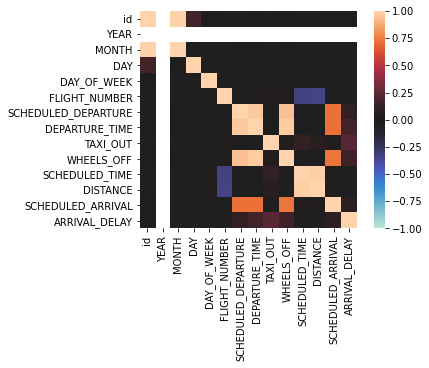

In [7]:
corr = train.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True)

In [ ]:
storms['STATE'] = storms['STATE'].replace(['NEW HAMPSHIRE'],'NH')
storms['STATE'] = storms['STATE'].replace(['ARKANSAS'],'AR')
storms['STATE'] = storms['STATE'].replace(['OKLAHOMA'],'OK')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'TX')
storms['STATE'] = storms['STATE'].replace(['ALABAMA'],'AL')
storms['STATE'] = storms['STATE'].replace(['ALASKA'],'AK')
storms['STATE'] = storms['STATE'].replace(['ARIZONA'],'AZ')
storms['STATE'] = storms['STATE'].replace(['CALIFORNIA'],'CA')
storms['STATE'] = storms['STATE'].replace(['COLORADO'],'CO')
storms['STATE'] = storms['STATE'].replace(['CONNECTICUT'],'CT')
storms['STATE'] = storms['STATE'].replace(['DELAWARE'],'DE')
storms['STATE'] = storms['STATE'].replace(['FLORIDA'],'FL')
storms['STATE'] = storms['STATE'].replace(['GEORGIA'],'GA')
storms['STATE'] = storms['STATE'].replace(['HAWAII'],'HI')
storms['STATE'] = storms['STATE'].replace(['IDAHO'],'ID')
storms['STATE'] = storms['STATE'].replace(['ILLINOIS'],'IL')
storms['STATE'] = storms['STATE'].replace(['INDIANA'],'IN')
storms['STATE'] = storms['STATE'].replace(['IOWA'],'IA')
storms['STATE'] = storms['STATE'].replace(['KANSAS'],'KS')
storms['STATE'] = storms['STATE'].replace(['KENTUCKY'],'KY')
storms['STATE'] = storms['STATE'].replace(['LOUISIANA'],'LA')
storms['STATE'] = storms['STATE'].replace(['MAINE'],'ME')
storms['STATE'] = storms['STATE'].replace(['MARYLAND'],'MD')
storms['STATE'] = storms['STATE'].replace(['MASSACHUSETTS'],'MA')
storms['STATE'] = storms['STATE'].replace(['MICHIGAN'],'MI')
storms['STATE'] = storms['STATE'].replace(['MINNESOTA'],'MN')
storms['STATE'] = storms['STATE'].replace(['MISSISSIPPI'],'MS')
storms['STATE'] = storms['STATE'].replace(['MISSOURI'],'MO')
storms['STATE'] = storms['STATE'].replace(['MONTANA'],'MT')
storms['STATE'] = storms['STATE'].replace(['NEBRASKA'],'NE')
storms['STATE'] = storms['STATE'].replace(['NEVADA'],'NV')
storms['STATE'] = storms['STATE'].replace(['NEW JERSEY'],'NJ')
storms['STATE'] = storms['STATE'].replace(['NEW MEXICO'],'NM')
storms['STATE'] = storms['STATE'].replace(['NEW YORK'],'NY')

storms['STATE'] = storms['STATE'].replace(['NORTH CAROLINA'],'NC')
storms['STATE'] = storms['STATE'].replace(['NORTH DAKOTA'],'ND')
storms['STATE'] = storms['STATE'].replace(['OHIO'],'OH')
storms['STATE'] = storms['STATE'].replace(['OREGON'],'OR')
storms['STATE'] = storms['STATE'].replace(['PENNSYLVANIA'],'PA')
storms['STATE'] = storms['STATE'].replace(['RHODE ISLAND'],'RI')
storms['STATE'] = storms['STATE'].replace(['SOUTH CAROLINA'],'SC')
storms['STATE'] = storms['STATE'].replace(['SOUTH DAKOTA'],'SD')
storms['STATE'] = storms['STATE'].replace(['TENNESSEE'],'MO')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'MT')
storms['STATE'] = storms['STATE'].replace(['UTAH'],'UT')
storms['STATE'] = storms['STATE'].replace(['VERMONT'],'VT')
storms['STATE'] = storms['STATE'].replace(['VIRGINIA'],'VA')
storms['STATE'] = storms['STATE'].replace(['WASHINGTON'],'WA')
storms['STATE'] = storms['STATE'].replace(['WEST VIRGINIA'],'WV')
storms['STATE'] = storms['STATE'].replace(['WISCONSIN'],'WI')
storms['STATE'] = storms['STATE'].replace(['WYOMING'],'WY')

storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['January'], '1')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['February'], '2')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['March'], '3')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['April'], '4')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['May'], '5')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['June'], '6')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['July'], '7')

In [ ]:
def airport_func (airport):
    if airport  == "AUS":
        state = "TX"
    elif airport == "ANC":
        state = "AK"
    elif airport == "SFO":
        state = "CA"
    elif airport == "LAX":
        state = "CA"
    elif airport == "SEA":
        state = "WA"
    elif airport == "LAS":
        state = "NV"
    elif airport == "DEN":
        state = "CO"
    elif airport == "SLC":
        state = "UT"
    elif airport == "PDX":
        state = "OR"
    elif airport == "FAI":
        state = "AK"
    elif airport == "MSP":
        state = "MN"
    elif airport == "PHX":
        state = "AZ"
    elif airport == "PBG":
        state = "NY"
    elif airport == "IAG":
        state = "NY"
    elif airport == "PSE":
        state = "CA"
    elif airport == "MKE":
        state = "WI"
    elif airport == "ORD":
        state = "IL"
    elif airport == "GEG":
        state = "WA"
    elif airport == "HNL":
        state = "HI"
    elif airport == "ONT":
        state = "CA"
    elif airport == "MCO":
        state = "FA"
    elif airport == "BOS":
        state = "MA"
    elif airport == "HIB":
        state = "MN"
    elif airport == "ABR":
        state = "SD"
    elif airport == "DFW":
        state = "TX"
        
    elif airport == "IAH":
        state = "TX"
    elif airport == "BNA":
        state = "MO"
    elif airport == "BRO":
        state = "TX"
    elif airport == "VPS":
        state = "FA"
    elif airport == "BOI":
        state = "ID"
    elif airport == "PHL":
        state = "PA"
    elif airport == "SBN":
        state = "IN"
    elif airport == "EUG":
        state = "OR"
    elif airport == "IAD":
        state = "VA"
    elif airport == "BUF":
        state = "NY"
    elif airport == "PMW":
        state = "ME"
    elif airport == "JFK":
        state = "NY"
    elif airport == "CRP":
        state = "TX"
    elif airport == "PIA":
        state = "IL"
    elif airport == "FAT":
        state = "CA"
    elif airport == "SMF":
        state = "CA"
    elif airport == "MCI":
        state = "MO"
    elif airport == "ATL":
        state = "GA"
        
    elif airport == "ATL":
        state = "GA"
    elif airport == "JAX":
        state = "FL"
    elif airport == "MFR":
        state = "OR"
    elif airport == "IDA":
        state = "ID"
    elif airport == "MSN":
        state = "WI"
    elif airport == "DCA":
        state = "VA"
    elif airport == "SAT":
        state = "TX"
    elif airport == "CHS":
        state = "SC"
    elif airport == "SBA":
        state = "CA"
    elif airport == "IND":
        state = "IN"
    elif airport == "DLE":
        state = "VA"
    elif airport == "GSP":
        state = "SC"
    elif airport == "BDL":
        state = "CT"
    elif airport == "RIC":
        state = "VA"
    elif airport == "BFL":
        state = "CA"
    elif airport == "OMA":
        state = "NE"
    elif airport == "RDM":
        state = "OR"
    elif airport == "FLL":
        state = "FL"
        
        
    elif airport == "CIP":
        state = "NV"
    elif airport == "TPA":
        state = "CA"
    elif airport == "SYR":
        state = "NY"
    elif airport == "ROC":
        state = "NY"
    elif airport == "TYR":
        state = "TX"
    elif airport == "LAN":
        state = "MI"
    elif airport == "GSO":
        state = "NC"
    elif airport == "EWR":
        state = "NJ"
    elif airport == "PBI":
        state = "CA"
    elif airport == "RSW":
        state = "CA"
    elif airport == "OAK":
        state = "CA"
    elif airport == "PVD":
        state = "RI"
    elif airport == "RNO":
        state = "NV"
    elif airport == "PIT":
        state = "PA"
    elif airport == "ABQ":
        state = "NM"
    elif airport == "MIA":
        state = "FL"
    elif airport == "BWI":
        state = "MD"
    elif airport == "TUL":
        state = "OK"
    elif airport == "LGA":
        state = "NY"
    elif airport == "LIT":
        state = "OR"
    elif airport == "MSY":
        state = "LA"
    
    elif airport == "OKC":
        state = "OK"
    elif airport == "ATW":
        state = "WI"
    elif airport == "PNS":
        state = "FL"
    elif airport == "MEM":
        state = "TN"
    elif airport == "TYS":
        state = "TN"
    elif airport == "MHT":
        state = "WA"
    elif airport == "SAV":
        state = "GA"
    elif airport == "CLT":
        state = "NC"
    elif airport == "GRB":
        state = "WI"
    elif airport == "ABE":
        state = "PA"
    elif airport == "JAN":
        state = "MS"
    elif airport == "OAJ":
        state = "NC"
    elif airport == "FAR":
        state = "ND"
    elif airport == "ERI":
        state = "PA"
    elif airport == "LEX":
        state = "KY"
    elif airport == "CWA":
        state = "WI"
    elif airport == "TIN":
        state = "AK"
    elif airport == "RDU":
        state = "NC"
    elif airport == "BHM":
        state = "AL"
    elif airport == "ACY":
        state = "NJ"
    elif airport == "DTW":
        state = "MI"
    elif airport == "RAP":
        state = "SD"
    elif airport == "TUS":
        state = "AZ"
        
    elif airport == "EAU":
        state = "WI"
    elif airport == "DLH":
        state = "MN"
    elif airport == "FSD":
        state = "SD"
    elif airport == "INL":
        state = "MN"
    elif airport == "SPI":
        state = "IL"
    elif airport == "CLD":
        state = "CA"
    elif airport == "COD":
        state = "WY"
    elif airport == "CMH":
        state = "OH"
    elif airport == "PSC":
        state = "WA"
    elif airport == "CPR":
        state = "WY"
    elif airport == "ACV":
        state = "CA"
    elif airport == "DAL":
        state = "TX"
    elif airport == "GUC":
        state = "CO"
    elif airport == "ORF":
        state = "VA"
    elif airport == "MOT":
        state = "ND"
    elif airport == "MLU":
        state = "LA"
    elif airport == "KOA":
        state = "HI"
    elif airport == "MOV":
        state = "WV"
    elif airport == "SAN":
        state = "CA"
    elif airport == "LAW":
        state = "OK"
    elif airport == "PIB":
        state = "MS"
    elif airport == "MGM":
        state = "AL"
    elif airport == "SBP":
        state = "CA"
        
    elif airport == "COS":
        state = "CO"
    elif airport == "LAR":
        state = "WY"
    elif airport == "DRO":
        state = "CO"
    elif airport == "BIS":
        state = "ND"
    elif airport == "ITO":
        state = "HI"
    elif airport == "BTR":
        state = "LA"
    elif airport == "HLN":
        state = "HI"
    elif airport == "BZN":
        state = "MT"
    elif airport == "MDW":
        state = "IL"
    elif airport == "MDT":
        state = "PA"
    elif airport == "SCE":
        state = "PA"
    elif airport == "LIH":
        state = "HI"
    elif airport == "TWF":
        state = "ID"
    elif airport == "BPT":
        state = "TX"
    elif airport == "GPT":
        state = "MS"
    elif airport == "STC":
        state = "MN"
    elif airport == "HPN":
        state = "NY"
    elif airport == "MLB":
        state = "FL"
    elif airport == "PLN":
        state = "MI"
    elif airport == "CIU":
        state = "MI"
    elif airport == "CAK":
        state = "OH"
    elif airport == "DSM":
        state = "IA"
    elif airport == "BLI":
        state = "WA"
    elif airport == "SHV":
        state = "LA"
        
    elif airport == "SNA":
        state = "CA"
    elif airport == "ALB":
        state = "NY"
    elif airport == "LNK":
        state = "NE"
    elif airport == "CMI":
        state = "IL"
    elif airport == "GTF":
        state = "MT"
    elif airport == "EKO":
        state = "NV"
    elif airport == "LGB":
        state = "CA"
    elif airport == "AVL":
        state = "NC"
    elif airport == "HSV":
        state = "AL"
    elif airport == "XNA":
        state = "AR"
    elif airport == "SUX":
        state = "IA"
    elif airport == "HYS":
        state = "KS"
    elif airport == "MFE":
        state = "TX"
    elif airport == "ISP":
        state = "NY"
    elif airport == "BUR":
        state = "CA"
    elif airport == "DAB":
        state = "FL"
    elif airport == "DAY":
        state = "OH"
    elif airport == "LFT":
        state = "LA"
    elif airport == "LBE":
        state = "PA"
    elif airport == "ASE":
        state = "CO"
    elif airport == "TKC":
        state = "MN"
    elif airport == "ALO":
        state = "IA"
    elif airport == "TLH":
        state = "FL"
        
        
    elif airport == "ELP":
        state = "TX"
    elif airport == "MHK":
        state = "KS"
    elif airport == "IMT":
        state = "MI"
    elif airport == "JNU":
        state = "AK"
    elif airport == "JAC":
        state = "WY"
    elif airport == "MET":
        state = "MA"
    elif airport == "PBQ":
        state = "FL"
    elif airport == "GNV":
        state = "FL"
    elif airport == "BRD":
        state = "MN"
    elif airport == "DIK":
        state = "ND"
    elif airport == "SFD":
        state = "SD"
    elif airport == "LBD":
        state = "AK"
    elif airport == "AVP":
        state = "PA"
    elif airport == "SGF":
        state = "MO"
    elif airport == "COU":
        state = "MO"
    elif airport == "BTM":
        state = "MT"
    elif airport == "ELM":
        state = "NY"
    elif airport == "RKS":
        state = "WY"
    elif airport == "PIH":
        state = "ID"
    elif airport == "SUN":
        state = "ID"
    elif airport == "LWS":
        state = "ID"
    elif airport == "VEL":
        state = "UT"
    elif airport == "SAF":
        state = "NM"
    
    elif airport == "YUM":
        state = "AZ"
    elif airport == "FCA":
        state = "MT"
    elif airport == "GRR":
        state = "MI"
    elif airport == "HDN":
        state = "CO"
    elif airport == "ROA":
        state = "VA"
    elif airport == "CHA":
        state = "TN"
    elif airport == "EYW":
        state = "FL"
    elif airport == "MYR":
        state = "SC"
    elif airport == "CRW":
        state = "WV"
    elif airport == "MQT":
        state = "MI"
    elif airport == "CHO":
        state = "VA"
    elif airport == "GJT":
        state = "CO"
    elif airport == "FWA":
        state = "IN"
    elif airport == "ECP":
        state = "FL"
    elif airport == "EVV":
        state = "IN"
    elif airport == "MSO":
        state = "MT"
    elif airport == "EGE":
        state = "CO"
    elif airport == "AMA":
        state = "TX"
    elif airport == "MLI":
        state = "IL"
    elif airport == "MBS":
        state = "MI"
    elif airport == "GFK":
        state = "ND"
    elif airport == "GRK":
        state = "TX"
    elif airport == "BIL":
        state = "MT"
    elif airport == "OTZ":
        state = "AK"
    
    elif airport == "KTN":
        state = "AK"
    elif airport == "ILM":
        state = "NC"
    elif airport == "PUB":
        state = "CO"
    elif airport == "RHI":
        state = "WI"
    elif airport == "CDC":
        state = "UT"
    elif airport == "HRL":
        state = "TX"
    elif airport == "SCC":
        state = "AK"
    elif airport == "FNT":
        state = "MI"
    elif airport == "LSE":
        state = "WI"
    elif airport == "MMH":
        state = "CA"
    elif airport == "ACT":
        state = "TX"
    elif airport == "FSM":
        state = "AR"
    elif airport == "AGS":
        state = "GA"
    elif airport == "CEC":
        state = "CA"
    elif airport == "ICT":
        state = "KS"
    elif airport == "AEX":
        state = "LA"
    elif airport == "DHN":
        state = "AL"
    elif airport == "LRD":
        state = "TX"
    elif airport == "WRG":
        state = "AK"
    elif airport == "PHF":
        state = "VA"
    elif airport == "CNY":
        state = "UT"
    elif airport == "BRW":
        state = "AK"
    elif airport == "GGG":
        state = "TX"
        
    elif airport == "AZO":
        state = "MI"
    elif airport == "CLL":
        state = "TX"
    elif airport == "SRQ":
        state = "FL"
    elif airport == "ORH":
        state = "MA"
    elif airport == "FLG":
        state = "AZ"
    elif airport == "TRI":
        state = "TN"
    elif airport == "VLD":
        state = "GA"
    elif airport == "SIT":
        state = "AK"
    elif airport == "BQK":
        state = "GA"
    elif airport == "BMI":
        state = "IL"
    elif airport == "PSG":
        state = "AK"
    elif airport == "FAY":
        state = "NC"
    elif airport == "MKG":
        state = "MI"
    elif airport == "CSG":
        state = "GA"
    elif airport == "MAF":
        state = "TX"
    elif airport == "EWN":
        state = "NC"
    elif airport == "OME":
        state = "AK"
    elif airport == "CMX":
        state = "MI"
    elif airport == "JMS":
        state = "ND"
    elif airport == "SGU":
        state = "UT"
    elif airport == "RST":
        state = "MN"
    elif airport == "GTR":
        state = "MS"
    elif airport == "BET":
        state = "AK"
    elif airport == "TOL":
        state = "OH"
        
    elif airport == "APN":
        state = "MI"
    elif airport == "SMX":
        state = "CA"
    elif airport == "LCH":
        state = "LA"
    elif airport == "RDD":
        state = "CA"
    elif airport == "GCK":
        state = "KS"
    elif airport == "DNL":
        state = "GA"
    elif airport == "GRI":
        state = "NE"
    elif airport == "ABY":
        state = "GA"
    elif airport == "SWF":
        state = "NY"
    elif airport == "ILG":
        state = "DE"
    elif airport == "JLN":
        state = "MO"
    elif airport == "ADK":
        state = "AK"
    elif airport == "UST":
        state = "FL"
    elif airport == "TXK":
        state = "AR"
    elif airport == "SPS":
        state = "TX"
    elif airport == "ABI":
        state = "TX"
    elif airport == "YAK":
        state = "AK"
    elif airport == "SJT":
        state = "TX"
    elif airport == "CDN":
        state = "SC"
    elif airport == "OTH":
        state = "OR"
    elif airport == "ADQ":
        state = "AK"
    elif airport == "ROW":
        state = "NM"
        
    elif airport == "BGM":
        state = "NY"
    elif airport == "BGR":
        state = "ME"
    elif airport == "ITH":
        state = "NY"
    elif airport == "ACK":
        state = "MA"
    elif airport == "MVY":
        state = "MA"
    elif airport == "WYS":
        state = "MT"
    elif airport == "DLG":
        state = "AK"
    elif airport == "AKN":
        state = "AK"
    elif airport == "GST":
        state = "AK"
    elif airport == "HYA":
        state = "MA"
    else:
        state = ""
    return state

In [16]:
train.loc[(train.DEPARTURE_TIME == 2400), 'DEPARTURE_TIME'] = 0

In [17]:
def scheduled_time_func(year, month, day, time):
    time = round(time)
    if day <= 9:
        day_string = '0'+ str(day)
    else:
        day_string = str(day)
    
    my_string = '0000'

    my_string = '0000' + str(time)

    length_string = len(str(time))

    time_string = my_string[length_string:]
    time_string = time_string[0:2]+':'+time_string[2:4]

    
    date_string =str(year)+ '-'+'0'+str(month)+'-'+day_string+ ' ' +time_string+ ':00' 
    
    datetime_object = datetime.fromisoformat(date_string)
    return datetime_object

In [18]:
time = scheduled_time_func(train['YEAR'][0],train['MONTH'][0],train['DAY'][0],train['SCHEDULED_DEPARTURE'][0])
print(time)

2015-01-01 00:05:00


In [19]:
time = scheduled_time_func(train['YEAR'][258405],train['MONTH'][258405],train['DAY'][258405],train['SCHEDULED_DEPARTURE'][258405])
print(time)

2015-01-18 11:30:00


In [20]:
def departure_time_func(year, month, day, time, scheduledDeparture, arrival_delay):
    time = round(time)
    if day <= 9:
        day_string = '0'+ str(day)
    else:
        day_string = str(day)
    
    my_string = '0000'

    my_string = '0000' + str(time)

    length_string = len(str(time))

    time_string = my_string[length_string:]
    time_string = time_string[0:2]+':'+time_string[2:4]

    
    date_string =str(year)+ '-'+'0'+str(month)+'-'+day_string+ ' ' +time_string+ ':00' 
    
    datetime_object = datetime.fromisoformat(date_string)
    
    #if(scheduledDeparture < datetime_object)and(arrival_delay<1440):
    #    datetime_object = datetime_object -timedelta(days=1)
    #elif arrival_delay>1440:
    #    datetime_object = datetime_object + timedelta(days=1)
    #else:
    #        datetime_object = datetime_object
    return datetime_object

In [21]:
train[train['ARRIVAL_DELAY'] >1440]

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,TS_SCHEDULED_DEPARTURE,TS_DEPARTURE_TIME
150600,150600,2015,1,11,7,AA,1595,N469AA,AUS,DFW,650,700.0,14.0,714.0,65.0,190,755,1444.0,NaT,NaT
258405,258405,2015,1,18,7,AA,224,N5DGAA,LAS,LAX,1130,1414.0,16.0,1430.0,76.0,236,1246,1593.0,NaT,NaT
305007,305007,2015,1,21,3,AA,2385,N4XNAA,JAX,DFW,1223,1240.0,14.0,1254.0,172.0,918,1415,1452.0,NaT,NaT
331026,331026,2015,1,23,5,AA,1322,N598AA,BHM,DFW,700,1608.0,13.0,1621.0,134.0,597,914,1971.0,NaT,NaT
387354,387354,2015,1,27,2,AA,1242,N586AA,FAT,DFW,659,850.0,19.0,909.0,191.0,1313,1210,1546.0,NaT,NaT
572725,572725,2015,2,9,1,HA,51,N374HA,JFK,HNL,935,924.0,18.0,942.0,675.0,4983,1550,1467.0,NaT,NaT
769725,769725,2015,2,22,7,AA,1080,N007AA,EGE,ORD,1415,1432.0,22.0,1454.0,158.0,1007,1753,1460.0,NaT,NaT
853639,853639,2015,2,28,6,AA,1312,N028AA,STL,MIA,620,847.0,71.0,958.0,168.0,1068,1008,1627.0,NaT,NaT
911947,911947,2015,3,4,3,AA,270,N5DJAA,HNL,LAX,828,1057.0,23.0,1120.0,327.0,2556,1555,1576.0,NaT,NaT
1004129,1004129,2015,3,10,2,AA,1594,N598AA,SAT,DFW,850,1047.0,14.0,1101.0,70.0,247,1000,1554.0,NaT,NaT


In [22]:
def jointrain_func(day, month, year, state):
    object_dmy_state = str(day)+'/'+str(month)+'/'+str(year)+'/'+str(state)

    return object_dmy_state

2015-01-02 23:55:00


In [ ]:
for ind in train.index:
    train.at[ind,'TS_SCHEDULED_DEPARTURE']= scheduled_time_func(train['YEAR'][ind],train['MONTH'][ind],train['DAY'][ind],train['SCHEDULED_DEPARTURE'][ind])
    train.at[ind,'TS_DEPARTURE_TIME'] = departure_time_func(train['YEAR'][ind],train['MONTH'][ind],train['DAY'][ind],train['DEPARTURE_TIME'][ind], train['TS_SCHEDULED_DEPARTURE'][ind], train['ARRIVAL_DELAY'][ind])


In [ ]:
for ind in range(0, 29886):
    train.at[ind,'TS_SCHEDULED_DEPARTURE']= scheduled_time_func(train['YEAR'][ind],train['MONTH'][ind],train['DAY'][ind],train['SCHEDULED_DEPARTURE'][ind])
    train.at[ind,'TS_DEPARTURE_TIME'] = departure_time_func(train['YEAR'][ind],train['MONTH'][ind],train['DAY'][ind],train['DEPARTURE_TIME'][ind], train['TS_SCHEDULED_DEPARTURE'][ind], train['ARRIVAL_DELAY'][ind])


In [ ]:
for ind in train.index:
    train.at[ind,'ORIGIN_AIRPORT_STATE']= airport_func(train['ORIGIN_AIRPORT'][ind])
    train.at[ind,'DESTINATION_AIRPORT_STATE']= airport_func(train['DESTINATION_AIRPORT'][ind])
    

In [ ]:
storms.info()

In [ ]:
for ind in test.index:
    test.at[ind,'ORIGIN_AIRPORT_STATE']= airport_func(test['ORIGIN_AIRPORT'][ind])
    test.at[ind,'DESTINATION_AIRPORT_STATE']= airport_func(test['DESTINATION_AIRPORT'][ind])

In [ ]:
string_name = jointrain_func(storms['BEGIN_DAY'][0],storms['MONTH_NAME'][0],storms['YEAR'][0], storms['STATE'][0] )
print(string_name)

In [ ]:
for ind in storms.index:
    storms.at[ind,'STATE_DATE']= jointrain_func(storms['BEGIN_DAY'][ind],storms['MONTH_NAME'][ind],storms['YEAR'][ind], storms['STATE'][ind] )
   


In [ ]:
for ind in storms.index:
    storms.at[ind,'STATE_DATE_DESTINATION']= jointrain_func(storms['BEGIN_DAY'][ind],storms['MONTH_NAME'][ind],storms['YEAR'][ind], storms['STATE'][ind] )
    storms.at[ind,'STATE_DATE_ORIGIN']= jointrain_func(storms['BEGIN_DAY'][ind],storms['MONTH_NAME'][ind],storms['YEAR'][ind], storms['STATE'][ind] ) 

In [ ]:
stormdatesDest = pd.DataFrame(storms['STATE_DATE_DESTINATION'])
stormdatesDest['EVENT_TYPE']= storms['EVENT_TYPE']
stormdatesOrigin = pd.DataFrame(storms['STATE_DATE_ORIGIN'])
stormdatesOrigin['EVENT_TYPE']= storms['EVENT_TYPE']

In [ ]:
for ind in train.index:
    train.at[ind,'STATE_DATE']= jointrain_func(train['DAY'][ind],train['MONTH'][ind],train['YEAR'][ind], train['ORIGIN_AIRPORT_STATE	'][ind] )
   

In [14]:
stormdates = pd.DataFrame(storms['STATE_DATE'])
stormdates['EVENT_TYPE']= storms['EVENT_TYPE']

KeyError: 'STATE_DATE'

In [15]:
stormdates2 =stormdates.rename(columns={"STATE_DATE": 'STATE_DATE_DESTINATION'})

NameError: name 'stormdates' is not defined

In [155]:
stormdates2.head()

,STATE_DATE_DESTINATION,EVENT_TYPE
0,27/1/2015/NH,Winter Storm
1,24/1/2015/NH,Heavy Snow
2,27/1/2015/NH,Blizzard
3,14/2/2015/NH,Heavy Snow
4,7/2/2015/NH,Heavy Snow


In [156]:
mergedPlains = pd.merge(train, stormdates, how ='left', on= ['STATE_DATE'])

In [158]:
mergedPlains.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT_STATE,DESTINATION_AIRPORT_STATE,STATE_DATE,STATE_DATE_DESTINATION,EVENT_TYPE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,15.0,205.0,1448,430,-22.0,AK,WA,1/1/2015/AK,1/1/2015/WA,Winter Storm
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,14.0,280.0,2330,750,-9.0,CA,CA,1/1/2015/CA,1/1/2015/CA,Frost/Freeze
2,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,14.0,280.0,2330,750,-9.0,CA,CA,1/1/2015/CA,1/1/2015/CA,Frost/Freeze
3,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,14.0,280.0,2330,750,-9.0,CA,CA,1/1/2015/CA,1/1/2015/CA,Drought
4,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,14.0,280.0,2330,750,-9.0,CA,CA,1/1/2015/CA,1/1/2015/CA,Drought


In [164]:
mergedPlains=mergedPlains.drop(['DAY_OF_WEEK', 'id'], axis = 1)

MemoryError: Unable to allocate 1.06 GiB for an array with shape (9, 15839469) and data type int64

In [ ]:
mergedPlains = pd.merge(mergedPlains, stormdates2, how ='left', on= ['STATE_DATE_DESTINATION'])

In [161]:
mergedPlains.tail()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT_STATE,DESTINATION_AIRPORT_STATE,STATE_DATE,STATE_DATE_DESTINATION,EVENT_TYPE
15839464,2818552,2015,6,30,2,UA,1903,N35271,IAH,SJU,...,21.0,275.0,2007,534,-8.0,TX,,30/6/2015/TX,30/6/2015/,Flash Flood
15839465,2818552,2015,6,30,2,UA,1903,N35271,IAH,SJU,...,21.0,275.0,2007,534,-8.0,TX,,30/6/2015/TX,30/6/2015/,Thunderstorm Wind
15839466,2818552,2015,6,30,2,UA,1903,N35271,IAH,SJU,...,21.0,275.0,2007,534,-8.0,TX,,30/6/2015/TX,30/6/2015/,Thunderstorm Wind
15839467,2818552,2015,6,30,2,UA,1903,N35271,IAH,SJU,...,21.0,275.0,2007,534,-8.0,TX,,30/6/2015/TX,30/6/2015/,Lightning
15839468,2818552,2015,6,30,2,UA,1903,N35271,IAH,SJU,...,21.0,275.0,2007,534,-8.0,TX,,30/6/2015/TX,30/6/2015/,Flash Flood


In [144]:
mergedPlains = mergedPlains.rename(columns={'EVENT_TYPE': 'EVENT_TYPE_ORIGIN'})

In [145]:
mergedPlains.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT_STATE,DESTINATION_AIRPORT_STATE,STATE_DATE,EVENT_TYPE_ORIGIN
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,21.0,15.0,205.0,1448,430,-22.0,AK,WA,1/1/2015/AK,Winter Storm
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,12.0,14.0,280.0,2330,750,-9.0,CA,CA,1/1/2015/CA,Frost/Freeze
2,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,12.0,14.0,280.0,2330,750,-9.0,CA,CA,1/1/2015/CA,Frost/Freeze
3,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,12.0,14.0,280.0,2330,750,-9.0,CA,CA,1/1/2015/CA,Drought
4,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,12.0,14.0,280.0,2330,750,-9.0,CA,CA,1/1/2015/CA,Drought


In [ ]:
for ind in train2.index:
    if() and ((train2[ORIGIN_AIRPORT_STATE][ind] == storms['']) or ):
        train2.at[ind,'STORM_EVENT'] = 
    else: 
        train.at[ind,'STORM_EVENT'] = ""


In [102]:
storms['STATE'] = storms['STATE'].replace(['NEW HAMPSHIRE'],'NH')
storms['STATE'] = storms['STATE'].replace(['ARKANSAS'],'AR')
storms['STATE'] = storms['STATE'].replace(['OKLAHOMA'],'OK')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'TX')
storms['STATE'] = storms['STATE'].replace(['ALABAMA'],'AL')
storms['STATE'] = storms['STATE'].replace(['ALASKA'],'AK')
storms['STATE'] = storms['STATE'].replace(['ARIZONA'],'AZ')
storms['STATE'] = storms['STATE'].replace(['CALIFORNIA'],'CA')
storms['STATE'] = storms['STATE'].replace(['COLORADO'],'CO')
storms['STATE'] = storms['STATE'].replace(['CONNECTICUT'],'CT')
storms['STATE'] = storms['STATE'].replace(['DELAWARE'],'DE')
storms['STATE'] = storms['STATE'].replace(['FLORIDA'],'FL')
storms['STATE'] = storms['STATE'].replace(['GEORGIA'],'GA')
storms['STATE'] = storms['STATE'].replace(['HAWAII'],'HI')
storms['STATE'] = storms['STATE'].replace(['IDAHO'],'ID')
storms['STATE'] = storms['STATE'].replace(['ILLINOIS'],'IL')
storms['STATE'] = storms['STATE'].replace(['INDIANA'],'IN')
storms['STATE'] = storms['STATE'].replace(['IOWA'],'IA')
storms['STATE'] = storms['STATE'].replace(['KANSAS'],'KS')
storms['STATE'] = storms['STATE'].replace(['KENTUCKY'],'KY')
storms['STATE'] = storms['STATE'].replace(['LOUISIANA'],'LA')
storms['STATE'] = storms['STATE'].replace(['MAINE'],'ME')
storms['STATE'] = storms['STATE'].replace(['MARYLAND'],'MD')
storms['STATE'] = storms['STATE'].replace(['MASSACHUSETTS'],'MA')
storms['STATE'] = storms['STATE'].replace(['MICHIGAN'],'MI')
storms['STATE'] = storms['STATE'].replace(['MINNESOTA'],'MN')
storms['STATE'] = storms['STATE'].replace(['MISSISSIPPI'],'MS')
storms['STATE'] = storms['STATE'].replace(['MISSOURI'],'MO')
storms['STATE'] = storms['STATE'].replace(['MONTANA'],'MT')
storms['STATE'] = storms['STATE'].replace(['NEBRASKA'],'NE')
storms['STATE'] = storms['STATE'].replace(['NEVADA'],'NV')
storms['STATE'] = storms['STATE'].replace(['NEW JERSEY'],'NJ')
storms['STATE'] = storms['STATE'].replace(['NEW MEXICO'],'NM')
storms['STATE'] = storms['STATE'].replace(['NEW YORK'],'NY')

storms['STATE'] = storms['STATE'].replace(['NORTH CAROLINA'],'NC')
storms['STATE'] = storms['STATE'].replace(['NORTH DAKOTA'],'ND')
storms['STATE'] = storms['STATE'].replace(['OHIO'],'OH')
storms['STATE'] = storms['STATE'].replace(['OREGON'],'OR')
storms['STATE'] = storms['STATE'].replace(['PENSSYLVANIA'],'PA')
storms['STATE'] = storms['STATE'].replace(['RHODE ISLAND'],'RI')
storms['STATE'] = storms['STATE'].replace(['SOUTH DAKOTA'],'SD')
storms['STATE'] = storms['STATE'].replace(['TENNESSEE'],'MO')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'MT')
storms['STATE'] = storms['STATE'].replace(['UTAH'],'UT')
storms['STATE'] = storms['STATE'].replace(['VERMONT'],'VT')
storms['STATE'] = storms['STATE'].replace(['VIRGINIA'],'VA')
storms['STATE'] = storms['STATE'].replace(['WASHINGTON'],'WA')
storms['STATE'] = storms['STATE'].replace(['WEST VIRGINIA'],'WV')
storms['STATE'] = storms['STATE'].replace(['WISCONSIN'],'WI')
storms['STATE'] = storms['STATE'].replace(['WYOMING'],'WY')

storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['January'], '1')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['February'], '2')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['March'], '3')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['April'], '4')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['May'], '5')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['June'], '6')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['July'], '7')

In [88]:
print(train['ORIGIN_AIRPORT'].unique())

['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP' 'PHX' 'SJU'
 'PBG' 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'HIB' 'ABR'
 'DFW' 'MKE' 'IAH' 'BNA' 'BRO' 'VPS' 'BOI' 'BJI' 'PHL' 'SBN' 'EUG' 'IAD'
 'BUF' 'PWM' 'JFK' 'CRP' 'PIA' 'FAT' 'SMF' 'AUS' 'MCI' 'ATL' 'JAX' 'MFR'
 'IDA' 'MSN' 'DCA' 'SAT' 'CHS' 'SBA' 'IND' 'CLE' 'GSP' 'BDL' 'RIC' 'BFL'
 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC' 'TYR' 'LAN' 'GSO' 'EWR' 'PBI'
 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'ABQ' 'MIA' 'BWI' 'TUL' 'LGA' 'LIT' 'MSY'
 'OKC' 'ATW' 'PNS' 'MEM' 'TYS' 'MHT' 'SAV' 'CLT' 'GRB' 'ABE' 'JAN' 'OAJ'
 'FAR' 'ERI' 'LEX' 'CWA' 'TTN' 'RDU' 'CVG' 'BHM' 'ACY' 'DTW' 'RAP' 'TUS'
 'EAU' 'DLH' 'FSD' 'INL' 'SPI' 'CLD' 'COD' 'CMH' 'PSC' 'CPR' 'ACV' 'DAL'
 'PAH' 'MRY' 'ESC' 'ISN' 'PSP' 'CAE' 'STL' 'BTV' 'MTJ' 'GCC' 'OGG' 'SJC'
 'GUC' 'ORF' 'MOT' 'MLU' 'KOA' 'HOU' 'MOB' 'SAN' 'LAW' 'PIB' 'MGM' 'SBP'
 'COS' 'LAR' 'DRO' 'BIS' 'ITO' 'BTR' 'HLN' 'BZN' 'MDW' 'MDT' 'SCE' 'LIH'
 'TWF' 'BPT' 'GPT' 'STC' 'HPN' 'MLB' 'PLN' 'CIU' 'C

In [105]:
def airport_func (airport):
    if airport  == "AUS":
        state = "TX"
    elif airport == "ANC":
        state = "AK"
    elif airport == "SFO":
        state = "CA"
    elif airport == "LAX":
        state = "CA"
    elif airport == "SEA":
        state = "WA"
    elif airport == "LAS":
        state = "NV"
    elif airport == "DEN":
        state = "CO"
    elif airport == "SLC":
        state = "UT"
    elif airport == "PDX":
        state = "OR"
    elif airport == "FAI":
        state = "AK"
    elif airport == "MSP":
        state = "MN"
    elif airport == "PHX":
        state = "AZ"
    elif airport == "PBG":
        state = "NY"
    elif airport == "IAG":
        state = "NY"
    elif airport == "PSE":
        state = "CA"
    elif airport == "MKE":
        state = "WI"
    elif airport == "ORD":
        state = "IL"
    elif airport == "GEG":
        state = "WA"
    elif airport == "HNL":
        state = "HI"
    elif airport == "ONT":
        state = "CA"
    elif airport == "MCO":
        state = "FA"
    elif airport == "BOS":
        state = "MA"
    elif airport == "HIB":
        state = "MN"
    elif airport == "ABR":
        state = "SD"
    elif airport == "DFW":
        state = "TX"
        
    elif airport == "IAH":
        state = "TX"
    elif airport == "BNA":
        state = "MO"
    elif airport == "BRO":
        state = "TX"
    elif airport == "VPS":
        state = "FA"
    elif airport == "BOI":
        state = "ID"
    elif airport == "PHL":
        state = "PA"
    elif airport == "SBN":
        state = "IN"
    elif airport == "EUG":
        state = "OR"
    elif airport == "IAD":
        state = "VA"
    elif airport == "BUF":
        state = "NY"
    elif airport == "PMW":
        state = "ME"
    elif airport == "JFK":
        state = "NY"
    elif airport == "CRP":
        state = "TX"
    elif airport == "PIA":
        state = "IL"
    elif airport == "FAT":
        state = "CA"
    elif airport == "SMF":
        state = "CA"
    elif airport == "MCI":
        state = "MO"
    elif airport == "ATL":
        state = "GA"
        
    elif airport == "ATL":
        state = "GA"
    elif airport == "JAX":
        state = "FL"
    elif airport == "MFR":
        state = "OR"
    elif airport == "IDA":
        state = "ID"
    elif airport == "MSN":
        state = "WI"
    elif airport == "DCA":
        state = "VA"
    elif airport == "SAT":
        state = "TX"
    elif airport == "CHS":
        state = "SC"
    elif airport == "SBA":
        state = "CA"
    elif airport == "IND":
        state = "IN"
    elif airport == "DLE":
        state = "VA"
    elif airport == "GSP":
        state = "SC"
    elif airport == "BDL":
        state = "CT"
    elif airport == "RIC":
        state = "VA"
    elif airport == "BFL":
        state = "CA"
    elif airport == "OMA":
        state = "NE"
    elif airport == "RDM":
        state = "OR"
    elif airport == "FLL":
        state = "FL"
        
        
    elif airport == "CIP":
        state = "NV"
    elif airport == "TPA":
        state = "CA"
    elif airport == "SYR":
        state = "NY"
    elif airport == "ROC":
        state = "NY"
    elif airport == "TYR":
        state = "TX"
    elif airport == "LAN":
        state = "MI"
    elif airport == "GSO":
        state = "NC"
    elif airport == "EWR":
        state = "NJ"
    elif airport == "PBI":
        state = "CA"
    elif airport == "RSW":
        state = "CA"
    elif airport == "OAK":
        state = "CA"
    elif airport == "PVD":
        state = "RI"
    elif airport == "RNO":
        state = "NV"
    elif airport == "PIT":
        state = "PA"
    elif airport == "ABQ":
        state = "NM"
    elif airport == "MIA":
        state = "FL"
    elif airport == "BWI":
        state = "MD"
    elif airport == "TUL":
        state = "OK"
    elif airport == "LGA":
        state = "NY"
    elif airport == "LIT":
        state = "OR"
    elif airport == "MSY":
        state = "LA"
    
    elif airport == "OKC":
        state = "OK"
    elif airport == "ATW":
        state = "WI"
    elif airport == "PNS":
        state = "FL"
    elif airport == "MEM":
        state = "TN"
    elif airport == "TYS":
        state = "TN"
    elif airport == "MHT":
        state = "WA"
    elif airport == "SAV":
        state = "GA"
    elif airport == "CLT":
        state = "NC"
    elif airport == "GRB":
        state = "WI"
    elif airport == "ABE":
        state = "PA"
    elif airport == "JAN":
        state = "MS"
    elif airport == "OAJ":
        state = "NC"
    elif airport == "FAR":
        state = "ND"
    elif airport == "ERI":
        state = "PA"
    elif airport == "LEX":
        state = "KY"
    elif airport == "CWA":
        state = "WI"
    elif airport == "TIN":
        state = "AK"
    elif airport == "RDU":
        state = "NC"
    elif airport == "BHM":
        state = "AL"
    elif airport == "ACY":
        state = "NJ"
    elif airport == "DTW":
        state = "MI"
    elif airport == "RAP":
        state = "SD"
    elif airport == "TUS":
        state = "AZ"
        
    elif airport == "EAU":
        state = "WI"
    elif airport == "DLH":
        state = "MN"
    elif airport == "FSD":
        state = "SD"
    elif airport == "INL":
        state = "MN"
    elif airport == "SPI":
        state = "IL"
    elif airport == "CLD":
        state = "CA"
    elif airport == "COD":
        state = "WY"
    elif airport == "CMH":
        state = "OH"
    elif airport == "PSC":
        state = "WA"
    elif airport == "CPR":
        state = "WY"
    elif airport == "ACV":
        state = "CA"
    elif airport == "DAL":
        state = "TX"
    elif airport == "GUC":
        state = "CO"
    elif airport == "ORF":
        state = "VA"
    elif airport == "MOT":
        state = "ND"
    elif airport == "MLU":
        state = "LA"
    elif airport == "KOA":
        state = "HI"
    elif airport == "MOV":
        state = "WV"
    elif airport == "SAN":
        state = "CA"
    elif airport == "LAW":
        state = "OK"
    elif airport == "PIB":
        state = "MS"
    elif airport == "MGM":
        state = "AL"
    elif airport == "SBP":
        state = "CA"
        
    elif airport == "COS":
        state = "CO"
    elif airport == "LAR":
        state = "WY"
    elif airport == "DRO":
        state = "CO"
    elif airport == "BIS":
        state = "ND"
    elif airport == "ITO":
        state = "HI"
    elif airport == "BTR":
        state = "LA"
    elif airport == "HLN":
        state = "HI"
    elif airport == "BZN":
        state = "MT"
    elif airport == "MDW":
        state = "IL"
    elif airport == "MDT":
        state = "PA"
    elif airport == "SCE":
        state = "PA"
    elif airport == "LIH":
        state = "HI"
    elif airport == "TWF":
        state = "ID"
    elif airport == "BPT":
        state = "TX"
    elif airport == "GPT":
        state = "MS"
    elif airport == "STC":
        state = "MN"
    elif airport == "HPN":
        state = "NY"
    elif airport == "MLB":
        state = "FL"
    elif airport == "PLN":
        state = "MI"
    elif airport == "CIU":
        state = "MI"
    elif airport == "CAK":
        state = "OH"
    elif airport == "DSM":
        state = "IA"
    elif airport == "BLI":
        state = "WA"
    elif airport == "SHV":
        state = "LA"
        
    elif airport == "SNA":
        state = "CA"
    elif airport == "ALB":
        state = "NY"
    elif airport == "LNK":
        state = "NE"
    elif airport == "CMI":
        state = "IL"
    elif airport == "GTF":
        state = "MT"
    elif airport == "EKO":
        state = "NV"
    elif airport == "LGB":
        state = "CA"
    elif airport == "AVL":
        state = "NC"
    elif airport == "HSV":
        state = "AL"
    elif airport == "XNA":
        state = "AR"
    elif airport == "SUX":
        state = "IA"
    elif airport == "HYS":
        state = "KS"
    elif airport == "MFE":
        state = "TX"
    elif airport == "ISP":
        state = "NY"
    elif airport == "BUR":
        state = "CA"
    elif airport == "DAB":
        state = "FL"
    elif airport == "DAY":
        state = "OH"
    elif airport == "LFT":
        state = "LA"
    elif airport == "LBE":
        state = "PA"
    elif airport == "ASE":
        state = "CO"
    elif airport == "TKC":
        state = "MN"
    elif airport == "ALO":
        state = "IA"
    elif airport == "TLH":
        state = "FL"
        
        
    elif airport == "ELP":
        state = "TX"
    elif airport == "MHK":
        state = "KS"
    elif airport == "IMT":
        state = "MI"
    elif airport == "JNU":
        state = "AK"
    elif airport == "JAC":
        state = "WY"
    elif airport == "MET":
        state = "MA"
    elif airport == "PBQ":
        state = "FL"
    elif airport == "GNV":
        state = "FL"
    elif airport == "BRD":
        state = "MN"
    elif airport == "DIK":
        state = "ND"
    elif airport == "SFD":
        state = "SD"
    elif airport == "LBD":
        state = "AK"
    elif airport == "AVP":
        state = "PA"
    elif airport == "SGF":
        state = "MO"
    elif airport == "COU":
        state = "MO"
    elif airport == "BTM":
        state = "MT"
    elif airport == "ELM":
        state = "NY"
    elif airport == "RKS":
        state = "WY"
    elif airport == "PIH":
        state = "ID"
    elif airport == "SUN":
        state = "ID"
    elif airport == "LWS":
        state = "ID"
    elif airport == "VEL":
        state = "UT"
    elif airport == "SAF":
        state = "NM"
    
    elif airport == "YUM":
        state = "AZ"
    elif airport == "FCA":
        state = "MT"
    elif airport == "GRR":
        state = "MI"
    elif airport == "HDN":
        state = "CO"
    elif airport == "ROA":
        state = "VA"
    elif airport == "CHA":
        state = "TN"
    elif airport == "EYW":
        state = "FL"
    elif airport == "MYR":
        state = "SC"
    elif airport == "CRW":
        state = "WV"
    elif airport == "MQT":
        state = "MI"
    elif airport == "CHO":
        state = "VA"
    elif airport == "GJT":
        state = "CO"
    elif airport == "FWA":
        state = "IN"
    elif airport == "ECP":
        state = "FL"
    elif airport == "EVV":
        state = "IN"
    elif airport == "MSO":
        state = "MT"
    elif airport == "EGE":
        state = "CO"
    elif airport == "AMA":
        state = "TX"
    elif airport == "MLI":
        state = "IL"
    elif airport == "MBS":
        state = "MI"
    elif airport == "GFK":
        state = "ND"
    elif airport == "GRK":
        state = "TX"
    elif airport == "BIL":
        state = "MT"
    elif airport == "OTZ":
        state = "AK"
    
    elif airport == "KTN":
        state = "AK"
    elif airport == "ILM":
        state = "NC"
    elif airport == "PUB":
        state = "CO"
    elif airport == "RHI":
        state = "WI"
    elif airport == "CDC":
        state = "UT"
    elif airport == "HRL":
        state = "TX"
    elif airport == "SCC":
        state = "AK"
    elif airport == "FNT":
        state = "MI"
    elif airport == "LSE":
        state = "WI"
    elif airport == "MMH":
        state = "CA"
    elif airport == "ACT":
        state = "TX"
    elif airport == "FSM":
        state = "AR"
    elif airport == "AGS":
        state = "GA"
    elif airport == "CEC":
        state = "CA"
    elif airport == "ICT":
        state = "KS"
    elif airport == "AEX":
        state = "LA"
    elif airport == "DHN":
        state = "AL"
    elif airport == "LRD":
        state = "TX"
    elif airport == "WRG":
        state = "AK"
    elif airport == "PHF":
        state = "VA"
    elif airport == "CNY":
        state = "UT"
    elif airport == "BRW":
        state = "AK"
    elif airport == "GGG":
        state = "TX"
        
    elif airport == "AZO":
        state = "MI"
    elif airport == "CLL":
        state = "TX"
    elif airport == "SRQ":
        state = "FL"
    elif airport == "ORH":
        state = "MA"
    elif airport == "FLG":
        state = "AZ"
    elif airport == "TRI":
        state = "TN"
    elif airport == "VLD":
        state = "GA"
    elif airport == "SIT":
        state = "AK"
    elif airport == "BQK":
        state = "GA"
    elif airport == "BMI":
        state = "IL"
    elif airport == "PSG":
        state = "AK"
    elif airport == "FAY":
        state = "NC"
    elif airport == "MKG":
        state = "MI"
    elif airport == "CSG":
        state = "GA"
    elif airport == "MAF":
        state = "TX"
    elif airport == "EWN":
        state = "NC"
    elif airport == "OME":
        state = "AK"
    elif airport == "CMX":
        state = "MI"
    elif airport == "JMS":
        state = "ND"
    elif airport == "SGU":
        state = "UT"
    elif airport == "RST":
        state = "MN"
    elif airport == "GTR":
        state = "MS"
    elif airport == "BET":
        state = "AK"
    elif airport == "TOL":
        state = "OH"
        
    elif airport == "APN":
        state = "MI"
    elif airport == "SMX":
        state = "CA"
    elif airport == "LCH":
        state = "LA"
    elif airport == "RDD":
        state = "CA"
    elif airport == "GCK":
        state = "KS"
    elif airport == "DNL":
        state = "GA"
    elif airport == "GRI":
        state = "NE"
    elif airport == "ABY":
        state = "GA"
    elif airport == "SWF":
        state = "NY"
    elif airport == "ILG":
        state = "DE"
    elif airport == "JLN":
        state = "MO"
    elif airport == "ADK":
        state = "AK"
    elif airport == "UST":
        state = "FL"
    elif airport == "TXK":
        state = "AR"
    elif airport == "SPS":
        state = "TX"
    elif airport == "ABI":
        state = "TX"
    elif airport == "YAK":
        state = "AK"
    elif airport == "SJT":
        state = "TX"
    elif airport == "CDN":
        state = "SC"
    elif airport == "OTH":
        state = "OR"
    elif airport == "ADQ":
        state = "AK"
    elif airport == "ROW":
        state = "NM"
        
    elif airport == "BGM":
        state = "NY"
    elif airport == "BGR":
        state = "ME"
    elif airport == "ITH":
        state = "NY"
    elif airport == "ACK":
        state = "MA"
    elif airport == "MVY":
        state = "MA"
    elif airport == "WYS":
        state = "MT"
    elif airport == "DLG":
        state = "AK"
    elif airport == "AKN":
        state = "AK"
    elif airport == "GST":
        state = "AK"
    elif airport == "HYA":
        state = "MA"
    else:
        state = ""
    return state

In [86]:
airport = airport_func(train['ORIGIN_AIRPORT'][0])
print(airport)

ANC
AK


In [106]:
for ind in train.index:
    train.at[ind,'ORIGIN_AIRPORT_STATE']= airport_func(train['ORIGIN_AIRPORT'][ind])
    train.at[ind,'DESTINATION_AIRPORT_STATE']= airport_func(train['DESTINATION_AIRPORT'][ind])
    
    


In [108]:
train2.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT_STATE,DESTINATION_AIRPORT_STATE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,AK,WA
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,CA,CA
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,CA,NC
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,CA,FL
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,WA,AK


In [109]:
stroms.head()

NameError: name 'stroms' is not defined

In [20]:
TrainingData = train.drop(['TAXI_OUT', 'WHEELS_OFF', 'DISTANCE','TAIL_NUMBER','FLIGHT_NUMBER','FLIGHT_NUMBER','AIRLINE','DAY_OF_WEEK','DAY','MONTH','YEAR','id'], axis = 1)

In [21]:
TrainingData = TrainingData.drop(['TS_DEPARTURE_TIME','TS_DEPARTURE_TIME'],axis =1)
TrainingData.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,TS_SCHEDULED_DEPARTURE
0,ANC,SEA,5,2354.0,205.0,430,-22.0,2015-01-01 00:05:00
1,LAX,PBI,10,2.0,280.0,750,-9.0,2015-01-01 00:10:00
2,SFO,CLT,20,18.0,286.0,806,5.0,2015-01-01 00:20:00
3,LAX,MIA,20,15.0,285.0,805,-9.0,2015-01-01 00:20:00
4,SEA,ANC,25,24.0,235.0,320,-21.0,2015-01-01 00:25:00


In [22]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer = torch.nn.Linear(1, 1)

   def forward(self, x):
       x = self.layer(x)      
       return x

net = Net()
print(net)

Net(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


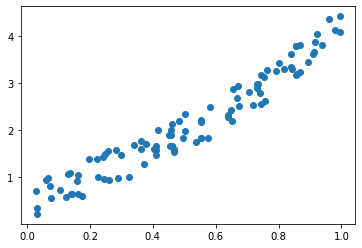

In [23]:
 # Visualize our data
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

In [24]:
# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()


In [25]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

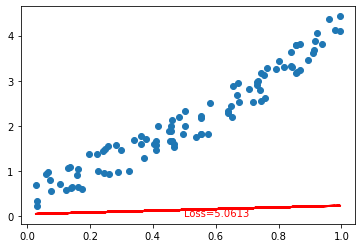

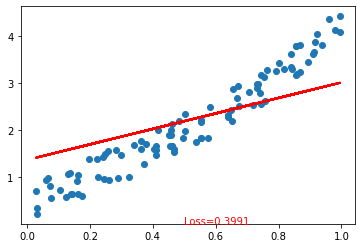

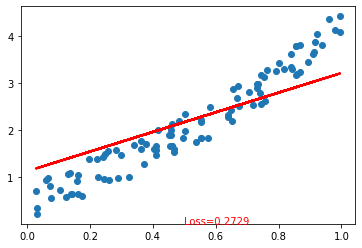

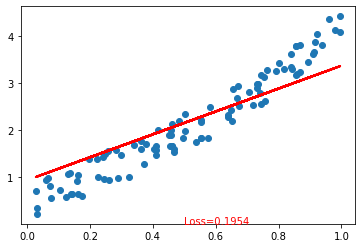

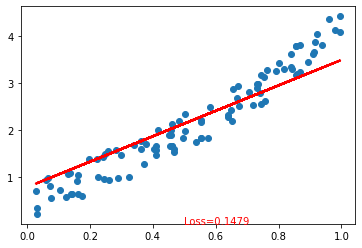

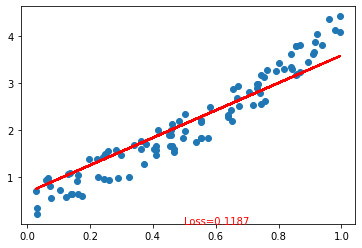

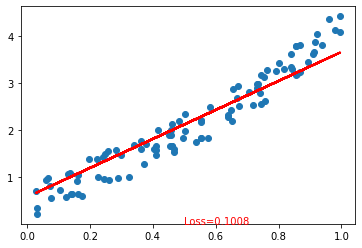

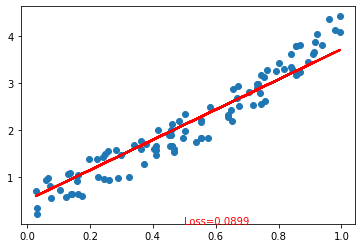

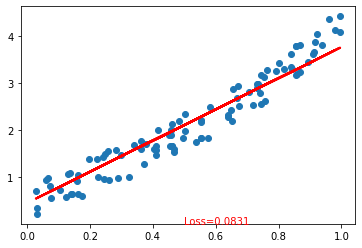

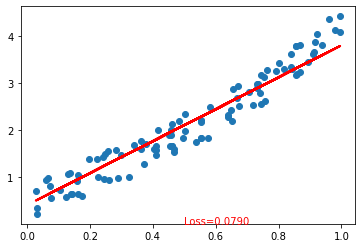

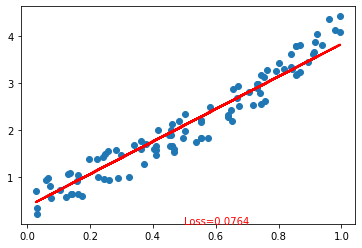

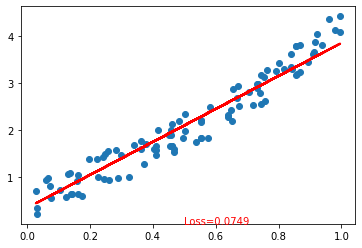

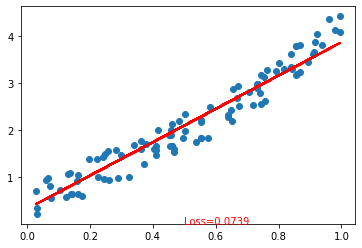

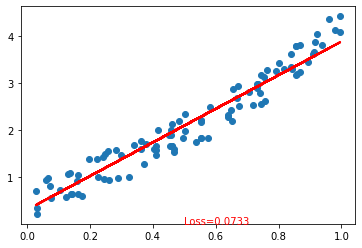

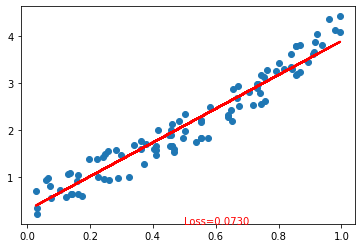

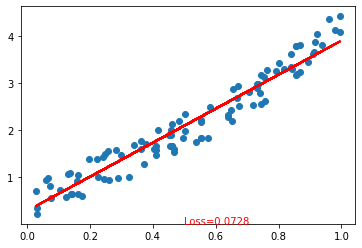

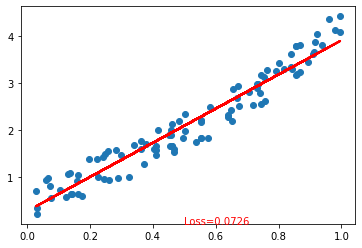

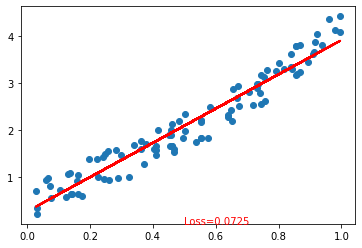

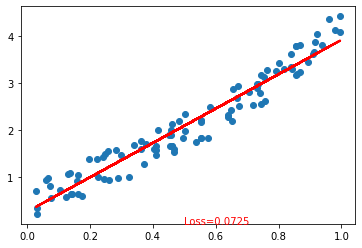

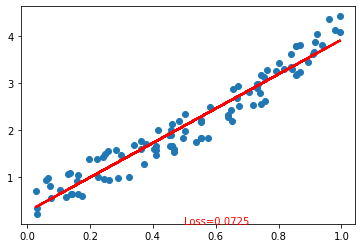

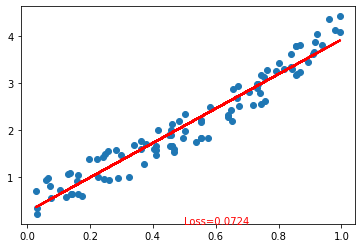

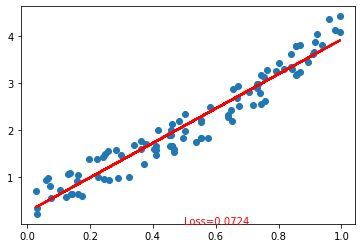

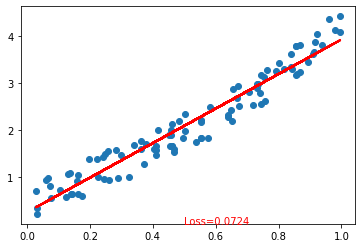

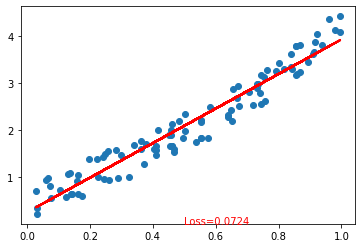

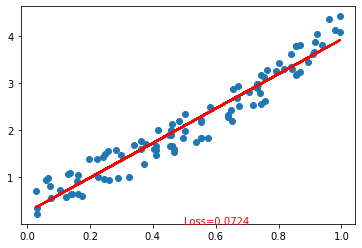

In [26]:
inputs = Variable(x)
outputs = Variable(y)
for i in range(250):
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 10 == 0:
       # plot and show learning process
       plt.cla()
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
       plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
       plt.pause(0.1)

plt.show()

In [27]:
x = train

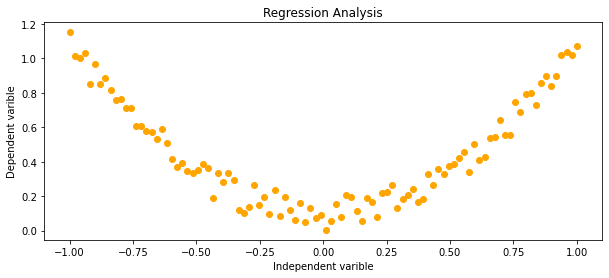

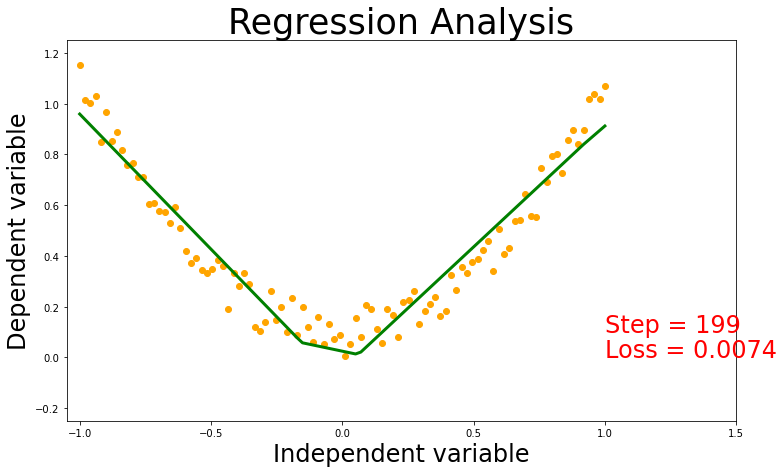

In [28]:
torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(200):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    

In [29]:
TrainingData.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,TS_SCHEDULED_DEPARTURE
0,ANC,SEA,5,2354.0,205.0,430,-22.0,2015-01-01 00:05:00
1,LAX,PBI,10,2.0,280.0,750,-9.0,2015-01-01 00:10:00
2,SFO,CLT,20,18.0,286.0,806,5.0,2015-01-01 00:20:00
3,LAX,MIA,20,15.0,285.0,805,-9.0,2015-01-01 00:20:00
4,SEA,ANC,25,24.0,235.0,320,-21.0,2015-01-01 00:25:00


In [30]:
TrainingData = TrainingData.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT','TS_SCHEDULED_DEPARTURE'],axis = 1)
TrainingData.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,5,2354.0,205.0,430,-22.0
1,10,2.0,280.0,750,-9.0
2,20,18.0,286.0,806,5.0
3,20,15.0,285.0,805,-9.0
4,25,24.0,235.0,320,-21.0


In [31]:
D = torch.tensor(TrainingData.values,dtype=torch.float )

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

In [33]:
type(x)

torch.Tensor

In [34]:
x = D[:,0:4]
y = D[:,-1]

x = torch.t(x)
y = torch.t(y)

type(x)

torch.Tensor

In [35]:
n = 4


In [36]:
# First we define the trainable parameters A and b 
A = torch.randn((1, n), requires_grad=True)
b = torch.randn(1, requires_grad=True)
type(A)

torch.Tensor

In [37]:
### Model definition ###

# First we define the trainable parameters A and b 
A = torch.randn((1, n), requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Then we define the prediction model
def model(x_input):
    #multiplication = A.mm(x) + b
    multiplication = torch.mm(A, x)
    return multiplication


### Loss function definition ###

def loss(y_predicted, y_target):
    return ((y_predicted - y_target)**2).sum()

# Training the model ###

# Setup the optimizer object, so it optimizes a and b.
optimizer = optim.Adam([A, b], lr=0.1)

# Main optimization loop
for t in range(2000):
    # Set the gradients to 0.
    optimizer.zero_grad()
    # Compute the current predicted y's from x_dataset
    y_predicted = model(x)
    # See how far off the prediction is
    current_loss = loss(y_predicted, y)
    # Compute the gradient of the loss with respect to A and b.
    current_loss.backward()
    # Update A and b accordingly.
    optimizer.step()
    print(f"t = {t}, loss = {current_loss}, A = {A.detach().numpy()}, b = {b.item()}")

In [39]:
storms = pd.read_csv('StormEvents2015V1.csv')

In [40]:

import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

In [41]:
num_rows = len(TrainingData.index)
num_columns = len(TrainingData.columns)
print(num_rows)
print(num_columns)

2818553
5


In [42]:
input_columns = TrainingData.columns.values[0:4]
output_columns = TrainingData.columns.values[4]
print(input_columns)
print(output_columns)

['SCHEDULED_DEPARTURE' 'DEPARTURE_TIME' 'SCHEDULED_TIME'
 'SCHEDULED_ARRIVAL']
ARRIVAL_DELAY


In [43]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [44]:
training_data = TrainingData

test_data = test.drop(['TAXI_OUT', 'WHEELS_OFF', 'DISTANCE','TAIL_NUMBER','FLIGHT_NUMBER','FLIGHT_NUMBER','AIRLINE','DAY_OF_WEEK','DAY','MONTH','YEAR','id',],axis = 1)



In [45]:
training_data.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,5,2354.0,205.0,430,-22.0
1,10,2.0,280.0,750,-9.0
2,20,18.0,286.0,806,5.0
3,20,15.0,285.0,805,-9.0
4,25,24.0,235.0,320,-21.0


In [46]:
test_data = test_data.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'],axis = 1)

In [47]:
test_data.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL
0,3,41.0,177.0,500
1,5,2400.0,303.0,808
2,5,2400.0,223.0,548
3,5,53.0,178.0,503
4,8,17.0,364.0,912


In [48]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

KeyError: 0